# Problema 1 - Optimización Lineal


1.	Se definen las variables de decisión:

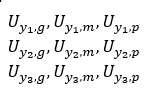

Siendo, por ejemplo, $U_{(y_1,g)}$ una unidad de producción de tamaño grande y producida en la planta 1. Es decir, los índices y_1 hace referencia a una unidad producida en la planta 1 y g hace referencia a una unidad de tamaño grande. La lógica anterior aplica para el resto de las variables.

2.	Restricciones
La Función objetivo se muestra, a continuación:
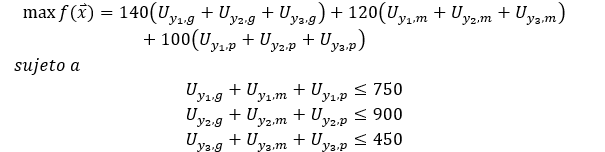

Las restricciones anteriores hacen referencia a la capacidad de mano de obra y equipo en exceso que tiene cada planta para producir un número de unidades por día de dicho producto sin importar el tamaño o la combinación de tamaños que se aplique.

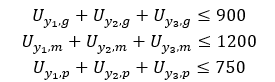

Las restricciones anteriores hacen referencia a los pronósticos de venta al día para cada tamaño del producto.

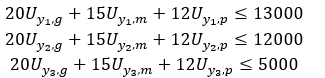

Finalmente, las restricciones anteriores hacen referencia a la capacidad de almacenamiento de cada planta en pies cuadrados.
Vale la pena aclarar que, otra de las restricciones para cada variable es que deben ser mayores o iguales a cero.


In [ ]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (se invierten los signos para maximizar)
c = [-140, -120, -100,-140, -120, -100,-140, -120, -100]

# Coeficientes de las restricciones (matriz A y vector b)
A = [[1,1,1,0,0,0,0,0,0], [0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1],
     [1,0,0,1,0,0,1,0,0],[0,1,0,0,1,0,0,1,0],[0,0,1,0,0,1,0,0,1],
     [20,15,12,0,0,0,0,0,0],[0,0,0,20,15,12,0,0,0],[0,0,0,0,0,0,20,15,12]]
b = [750, 900, 450, 900, 1200, 750, 13000, 12000, 5000]

# Límites de las variables (x1, x2)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
x5_bounds = (0, None)
x6_bounds = (0, None)
x7_bounds = (0, None)
x8_bounds = (0, None)



# Opciones para mostrar el informe del proceso de optimización
options = {'disp': True}

# Llamada a la función de optimización lineal con el método de Revised Simplex y opciones de visualización
resultado = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds,x6_bounds, x7_bounds,x8_bounds], method='revised simplex', options=options)

# Mostrar resultados
print("Valor Máximo de la Función Objetivo:", -resultado.fun)
print("Argumentos Óptimos:", resultado.x)


Phase Iteration Minimum Slack       Constraint Residual Objective          
1     0         450.0               0.0                 0.0                 
Phase Iteration Minimum Slack       Constraint Residual Objective          
2     0         450.0               0.0                 0.0                 
2     1         0.0                 0.0                 -91000.0            
2     2         0.0                 0.0                 -126000.0           
2     3         0.0                 0.0                 -174000.0           
2     4         0.0                 0.0                 -182000.0           
2     5         0.0                 0.0                 -222000.0           
2     6         0.0                 0.0                 -228000.0           
2     7         0.0                 0.0                 -234666.6666667     
2     8         0.0                 0.0                 -236000.0           
Optimization terminated successfully.
         Current function value: -236000

<ipython-input-2-445d3b243547>:29: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  resultado = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds,x2_bounds, x3_bounds,x4_bounds, x5_bounds,x6_bounds, x7_bounds,x8_bounds], method='revised simplex', options=options)


4. De esta manera, el valor de cada una de las variables es:

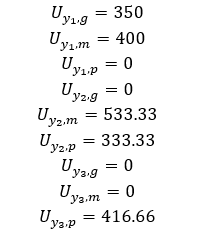

Es decir, la planta 1 debe producir 350 unidades grandes y 400 medianas, la planta 2 debe producir 533 medianas y 333 pequeñas, y la planta 3 debe producir 416 pequeñas.
Finalmente, el valor de la función objetivo es: $236,000.


# Problema 2 - Optimización No Lineal
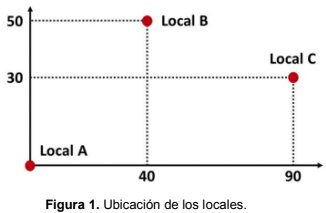


**a) Plantear las variables de decisión**

Como se busca que la bodega esté a la menor distancia posible de los tres locales, entonces se necesitará decidir una distancia horizontal $x$ y una distancia vertical $y$ a partir del origen.

Variables: $x$, $y$ (Las coordenadas en las que se ubica la bodega), que se puede representar como el vector posición $r⃗$ = $[x, y]^T$

\\
**b) Formule la expresión matemática o función objetivo que le permite resolver el problema.**

$min$ $d_A + d_B + d_C$

donde $d_i$ es la distancia lineal entre el Local $i$ y la bodega.

La distancia euclidiana entre el punto terminal de dos vectores en el plano bidimensional está dada por: $d_i = |r_i⃗-r ⃗| = \sqrt{(x_i - x)^2 + (y_i - y)^2}$

Por eso, la función objetivo queda de la siguiente manera:

$min$ $\sqrt{x^2 + y^2} + \sqrt{(x-40)^2 + (y-50)^2} + \sqrt{(x-90)^2 + (y-30)^2}$

\\
**c) ¿Se puede reformular este problema de manera lineal sin cambiar las variables de decisión?**

No es necesariamente viable reformular el problema, pero sí se podría hacer manteniendo las variables de decisión. Lo que sería necesario es plantear otro criterio para la función objetivo. Por ejemplo, en vez de recurrir a la distancia se podría emplear la distancia al cuadrado y llegar a ella por medio de un método indirecto como el producto punto.

La distancia al cuadrado entre dos vectores $\vec{a}$ y $\vec{b}$ se puede obtener como:

$|\vec{a}-\vec{b}|^2 = (\vec{a}-\vec{b})\cdot(\vec{a}-\vec{b})$

Como el producto punto es lineal, la suma de los productos punto también es lineal. La función objetivo se podría plantear entonces como:

$min$ $(\vec{x}-\vec{x_A})\cdot(\vec{x}-\vec{x_A}) + (\vec{x}-\vec{x_B})\cdot(\vec{x}-\vec{x_B}) + (\vec{x}-\vec{x_C})\cdot(\vec{x}-\vec{x_C})$

\\
**d) Use la función minimize de la libreria scipy.optimize para resolver el problema.**


In [14]:
from scipy.optimize import minimize
import math as m
import numpy as np

# Definir los arreglos con las posiciones de los locales
local_a = np.array((0,0))
local_b = np.array((40,50))
local_c = np.array((90,30))
# Definir un arreglo con valores iniciales aleatorios
bodega = np.random.random(2)

# Definir la función objetivo
def funcion_objetivo(bodega, local_a, local_b, local_c):
  return np.linalg.norm(local_a - bodega) + np.linalg.norm(local_b - bodega) + np.linalg.norm(local_c - bodega)

res = minimize(funcion_objetivo, bodega, args=(local_a, local_b, local_c), method="BFGS", constraints=None, bounds=None)
print(res)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 117.1143358644895
        x: [ 4.204e+01  4.255e+01]
      nit: 13
      jac: [-9.537e-07  0.000e+00]
 hess_inv: [[ 9.662e+00 -8.006e+00]
            [-8.006e+00  3.419e+01]]
     nfev: 54
     njev: 18


In [13]:
print("Las coordenadas de la bodega que minimizan su distancia a los tres locales son: \nx: " + str(res.x[0]) + "\ny: " + str(res.x[1]))
print("\nLa distancia total mínima a los tres locales es: " + str(res.fun))
print("\nLa distancia al Local A desde (x,y) es: " + str(np.linalg.norm(local_a - res.x)))
print("La distancia al Local B desde (x,y) es: " + str(np.linalg.norm(local_b - res.x)))
print("La distancia al Local C desde (x,y) es: " + str(np.linalg.norm(local_c - res.x)))

Las coordenadas de la bodega que minimizan su distancia a los tres locales son: 
x: 42.04476154036936
y: 42.54569636014232

La distancia total mínima a los tres locales es: 117.11433586447836

La distancia al Local A desde (x,y) es: 59.815535204125275
La distancia al Local B desde (x,y) es: 7.729663156449257
La distancia al Local C desde (x,y) es: 49.56913750390384


**e) Explique los resultados dentro del contexto del problema.**

En el contexto del problema, los resultados indican que la posición óptima para ubicar la bodega es en la coordenada (42.04476, 42.54570).

El resultado de ubicar la bodega en ese punto es que la suma del total de las distancias entre los tres locales y la bodega se reduce a su valor mínimo. Este valor es de 117.1143 unidades. Cabe resaltar que en esta ubicación la distancia es menor con el Local B.

Adicionalmente, podrían definirse unos hiperparámetros $\alpha$, $\beta$ y $\gamma$ para cada una de las distancias $D_i$. Dependiendo del valor de estos hiperparámetros, el problema de optimización se replantearía para que se priorice la minimización de una de las distancias sobre las demás. Sin embargo, en esta oportunidad, la minimización es equitativa por lo cual, en caso de que el software haya arrojado la solución óptima del problema, la coordenada correspondería a la media geométrica (o centro de masa) de las coordenadas de los tres locales.